import pandas as pd 
import numpy as np 
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 
import seaborn as sns 

In [5]:
data = pd.read_csv("./BMW sales data (2010-2024) (1).csv")

## Step 1: Data DEFINE - Are we Solving the Right Problem? 

In [233]:
# start with these list of questions: 

# 1.) How much did each model sell, each year? 2013 to 2024?

# 2.) How were model sales in each location? How about over each year? 
# 3.) which Models gave attributed most to revenue? 
# 4.) specific features- which features were seem to be most repeated during most sold cars? 


# Split up analysis: Create one descriptive analysis, that explains:
# 1.) best sellers/worst sellers, 2.) Geographically best sellers 3.) What color sold the most? Fuel type 

# THEN, Lets build a predictive model, which factors in relevant features, which will predict if sales classification will be high or low 



#### 1.a) How much did each model sell, from 2013 to 2024? 

In [236]:
data.head(20)

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,Revenue
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High,819542000
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low,271562732
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low,792175410
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low,246749637
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low,153685840
5,5 Series,2017,Middle East,Silver,Diesel,Manual,1.9,171362,42926,1232,Low,52884832
6,i8,2022,Europe,White,Diesel,Manual,1.8,196741,55064,7949,High,437703736
7,M5,2014,Asia,Black,Diesel,Automatic,1.6,121156,102778,632,Low,64955696
8,X3,2016,South America,White,Diesel,Automatic,1.7,48073,116482,8944,High,1041815008
9,i8,2019,Europe,White,Electric,Manual,3.0,35700,96257,4411,Low,424589627


In [241]:
pd.Series(data['Year'].unique()).sort_values(ascending = True)

13    2010
10    2011
8     2012
1     2013
6     2014
9     2015
0     2016
5     2017
14    2018
7     2019
4     2020
11    2021
2     2022
12    2023
3     2024
dtype: int64

In [267]:
# Grouping Sales Volume per model, per year. Will ignore geography for now
modelsales_volume = data.groupby(['Model','Year'], as_index=False)['Sales_Volume'].sum().sort_values(by=['Model','Year'])

In [279]:
print(modelsales_volume.head())
print(modelsales_volume.shape)

      Model  Year  Sales_Volume
0  3 Series  2010       1647769
1  3 Series  2011       1473102
2  3 Series  2012       1378152
3  3 Series  2013       1448530
4  3 Series  2014       1682545
(165, 3)


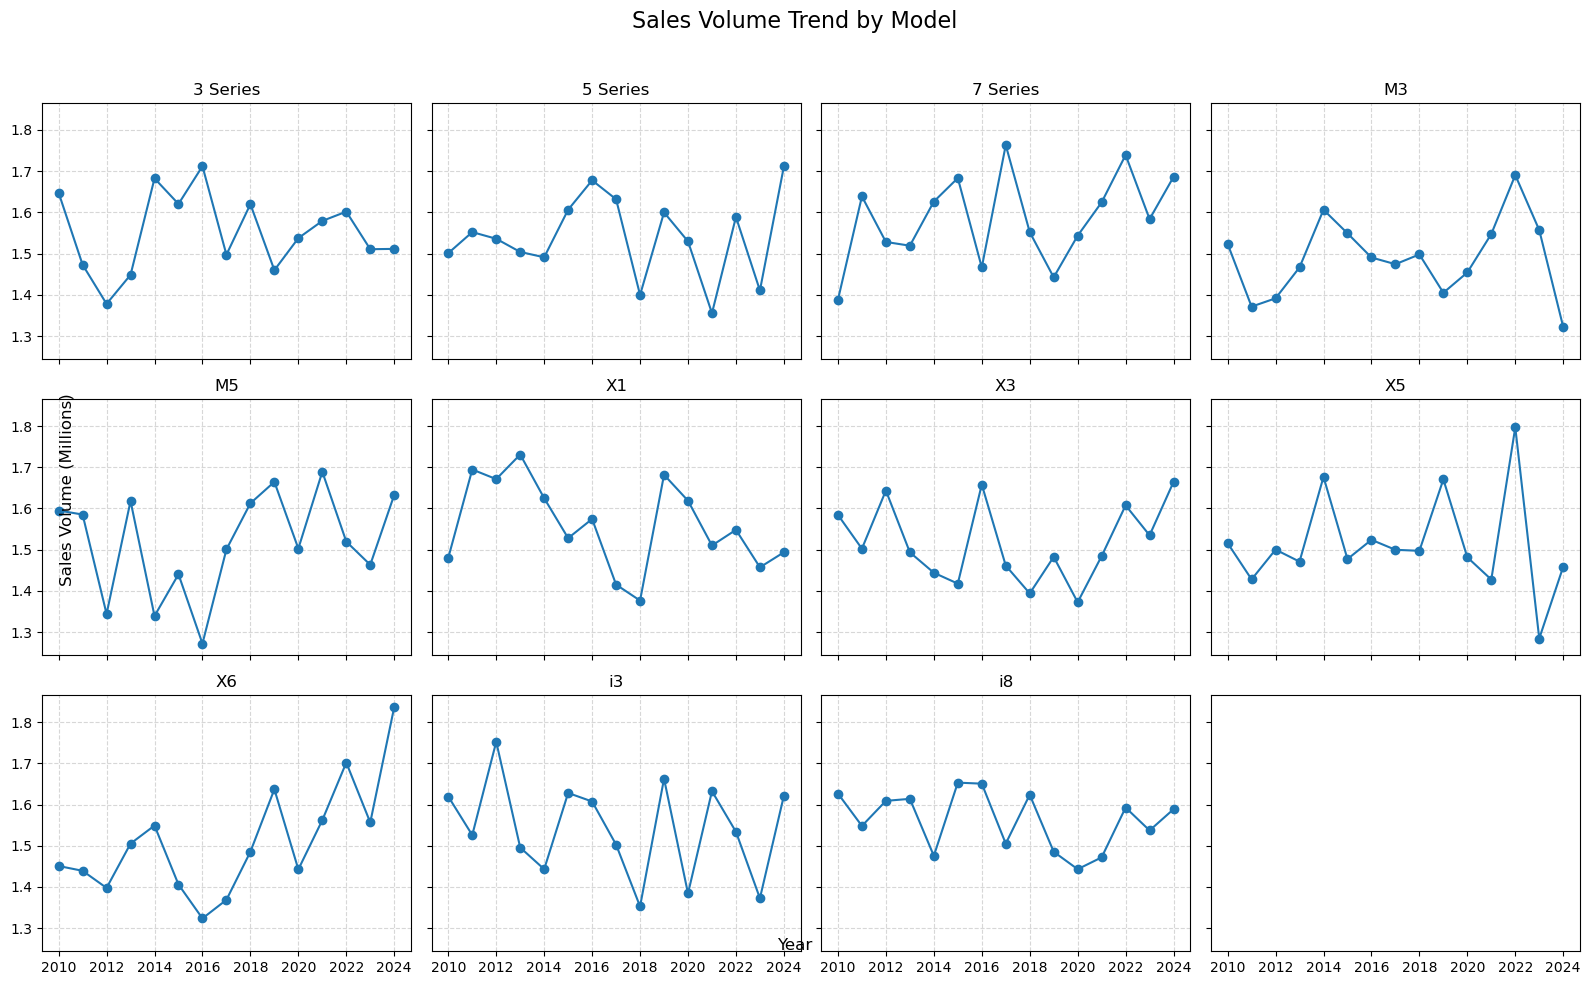

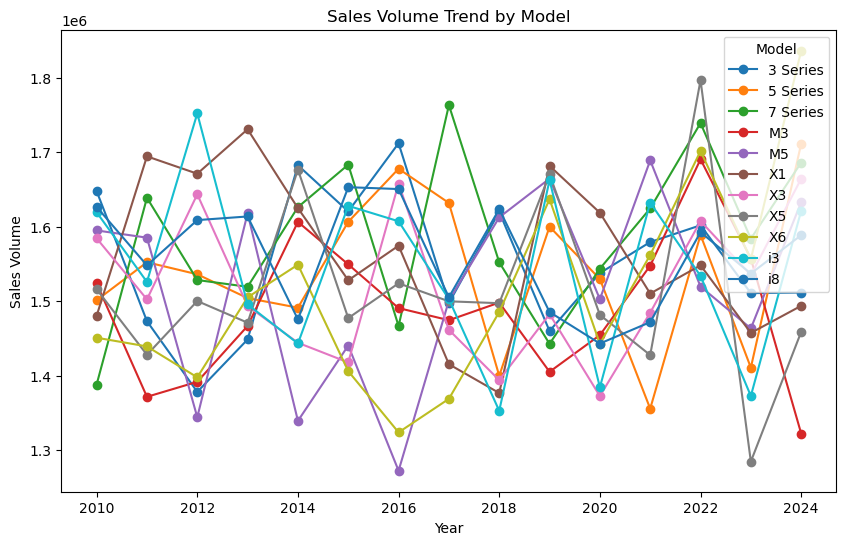

In [305]:
# Number of unique models
models = modelsales_volume['Model'].unique()
n_models = len(models)

# Define grid size (e.g., 3 rows × 4 cols for 11 models)
n_cols = 4
n_rows = math.ceil(n_models / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 10), sharex=True, sharey=True)
axes = axes.flatten()  # Flatten axes array for easy indexing

for i, model_name in enumerate(models):
    ax = axes[i]
    group = modelsales_volume[modelsales_volume['Model'] == model_name].sort_values('Year')
    ax.plot(group['Year'], group['Sales_Volume'] / 1_000_000, marker='o', color='tab:blue')
    ax.set_title(model_name)
    ax.grid(True, linestyle='--', alpha=0.5)

# Label only outer plots
for ax in axes:
    ax.label_outer()

# Common labels
fig.text(0.5, 0.04, 'Year', ha='center', fontsize=12)
fig.text(0.04, 0.5, 'Sales Volume (Millions)', va='center', rotation='vertical', fontsize=12)

fig.suptitle('Sales Volume Trend by Model', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

print('\n'
# Initalize figure 
fig, ax = plt.subplots(figsize = (10,6))

for model_name, group in modelsales_volume.groupby('Model'):
    ax.plot(group['Year'], group['Sales_Volume'], marker='o', label=model_name)


ax.set_xlabel('Year')
ax.set_ylabel('Sales Volume')
ax.set_title('Sales Volume Trend by Model')
ax.legend(title='Model')
plt.show()

In [299]:
# 2.) How were model sales in each location? How about over each year?





## Step 2: Data Discover - What Data do we need?

## Step 3: Data Exploration - What does the data tell us? (We create summary stats and inital visuals to explain to stakeholders

## Step 4: Analyze - What type of analytics will solve the problem?

## Step 5: Communicate findings to stakeholders: remember Situation, complicaiton, Resolution

## Step 6: Operationalize: Put Solution into Production

In [229]:
# 1.) How much did each model sell, each year? 2013 to 2024?

data2 = data[['Model','Year','Sales_Volume','Sales_Classification']]

In [231]:
data2.head()

,Model,Year,Sales_Volume,Sales_Classification
0,5 Series,2016,8300,High
1,i8,2013,3428,Low
2,5 Series,2022,6994,Low
3,X3,2024,4047,Low
4,7 Series,2020,3080,Low


In [101]:
data["Revenue"] = data["Price_USD"]*data["Sales_Volume"]
sales_overview = data[["Model","Year","Region","Price_USD","Sales_Volume", "Revenue"]]
sales_overview.head()

,Model,Year,Region,Price_USD,Sales_Volume,Revenue
0,5 Series,2016,Asia,98740,8300,819542000
1,i8,2013,North America,79219,3428,271562732
2,5 Series,2022,North America,113265,6994,792175410
3,X3,2024,Middle East,60971,4047,246749637
4,7 Series,2020,South America,49898,3080,153685840


In [131]:
# Focusing on North American Market in 2022-2024
sales_overviewNA = sales_overview[(sales_overview["Region"]=="North America") & (sales_overview["Year"].isin([2022,2023,2024]))].sort_values(by='Revenue', ascending = False)
sales_overviewNA

,Model,Year,Region,Price_USD,Sales_Volume,Revenue
2978,i3,2024,North America,118008,9981,1177837848
25747,3 Series,2023,North America,115456,9988,1153174528
18967,X6,2023,North America,116858,9745,1138781210
12118,X3,2023,North America,119926,9465,1135099590
5665,7 Series,2023,North America,119332,9473,1130432036
...,...,...,...,...,...,...
34864,3 Series,2023,North America,34998,138,4829724
26335,5 Series,2024,North America,46642,101,4710842
14579,i3,2022,North America,38233,103,3937999
12756,7 Series,2022,North America,38027,103,3916781


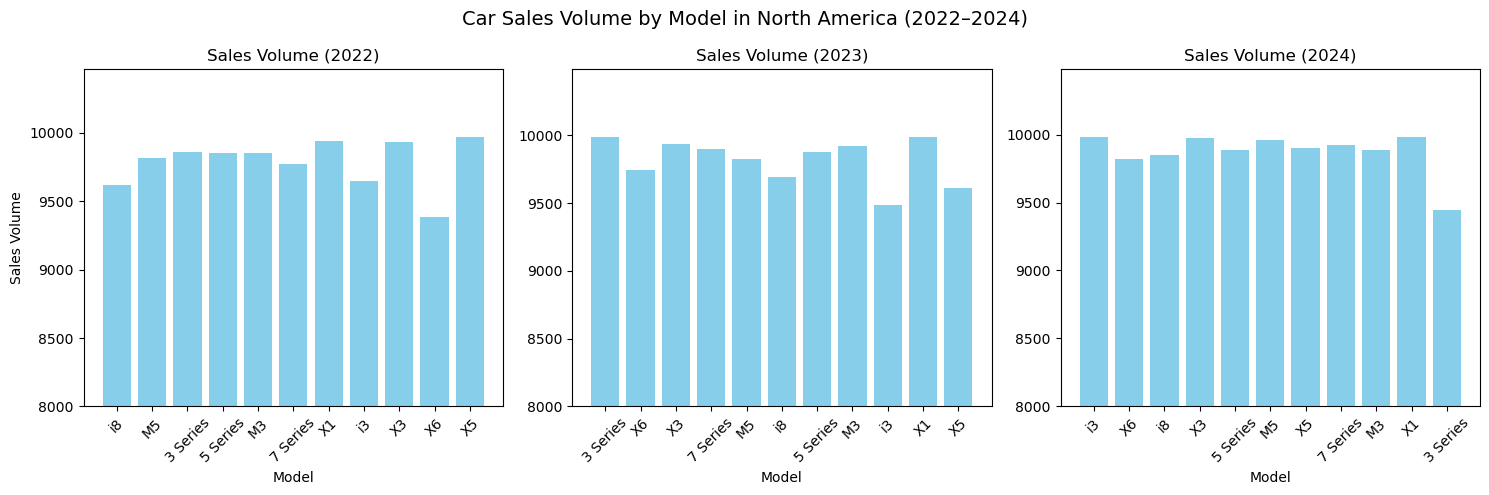

In [161]:
# Create subplots( 3 columns, 1 row) 

fig, axes = plt.subplots(1,3,figsize =(15,5))

years = [2022,2023,2024]

# Loop through each year and each subplot axis
for ax, year in zip(axes, years):
    # Filter the data for that year
    year_data = sales_overviewNA.loc[sales_overviewNA["Year"] == year]
    
    # Create a bar chart for that year
    ax.bar(year_data["Model"], year_data["Sales_Volume"], color="skyblue")
    
    # Add title and labels
    ax.set_title(f"Sales Volume ({year})")
    ax.set_xlabel("Model")
    
    # Rotate x-axis labels for readability
    ax.tick_params(axis='x', rotation=45)

    ax.set_ylim(bottom=8000)

# Add a shared y-axis label
axes[0].set_ylabel("Sales Volume")


# Add a global title and adjust spacing
fig.suptitle("Car Sales Volume by Model in North America (2022–2024)", fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
# Group and reset index so Year and Region become columns again
test = data[["Region", "Year", "Revenue"]].groupby(["Region", "Year"]).sum().reset_index()

# Get unique regions
regions = test["Region"].unique()

# Create subplots (1 column, as many rows as regions)
fig, axes = plt.subplots(len(regions), 1, figsize=(10, 5 * len(regions)), sharex=True)

# If only one region, axes won’t be iterable
if len(regions) == 1:
    axes = [axes]

# Plot each region in its own subplot
for ax, region in zip(axes, regions):
    region_data = test[test["Region"] == region]
    ax.plot(region_data["Year"], region_data["Revenue"], marker='o', color='tab:blue')
    ax.set_title(f"Revenue Trend - {region}")
    ax.set_xlabel("Year")
    ax.set_ylabel("Revenue")
    ax.grid(True)

plt.tight_layout()
plt.show()

In [25]:
north_america_sales = data[data["Region"] == "North America"]
north_america_sales

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,Revenue
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low,271562732
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low,792175410
11,i8,2016,North America,Blue,Hybrid,Manual,1.9,116863,74539,8252,High,615095828
12,7 Series,2020,North America,Silver,Diesel,Automatic,3.8,27403,100015,8111,High,811221665
15,M3,2014,North America,Silver,Hybrid,Manual,3.0,154050,94997,7765,High,737651705
...,...,...,...,...,...,...,...,...,...,...,...,...
49984,5 Series,2019,North America,White,Diesel,Manual,4.5,48562,31520,7108,High,224044160
49985,M3,2013,North America,Blue,Diesel,Automatic,4.1,187308,72924,8236,High,600602064
49990,3 Series,2016,North America,Grey,Petrol,Automatic,3.7,199549,73173,9181,High,671801313
49994,5 Series,2010,North America,Silver,Petrol,Manual,3.6,56672,32990,1575,Low,51959250


In [88]:
data.dtypes

Model                    object
Year                      int64
Region                   object
Color                    object
Fuel_Type                object
Transmission             object
Engine_Size_L           float64
Mileage_KM                int64
Price_USD                 int64
Sales_Volume              int64
Sales_Classification     object
Revenue                   int64
dtype: object

In [90]:
data.isna().any()

Model                   False
Year                    False
Region                  False
Color                   False
Fuel_Type               False
Transmission            False
Engine_Size_L           False
Mileage_KM              False
Price_USD               False
Sales_Volume            False
Sales_Classification    False
Revenue                 False
dtype: bool

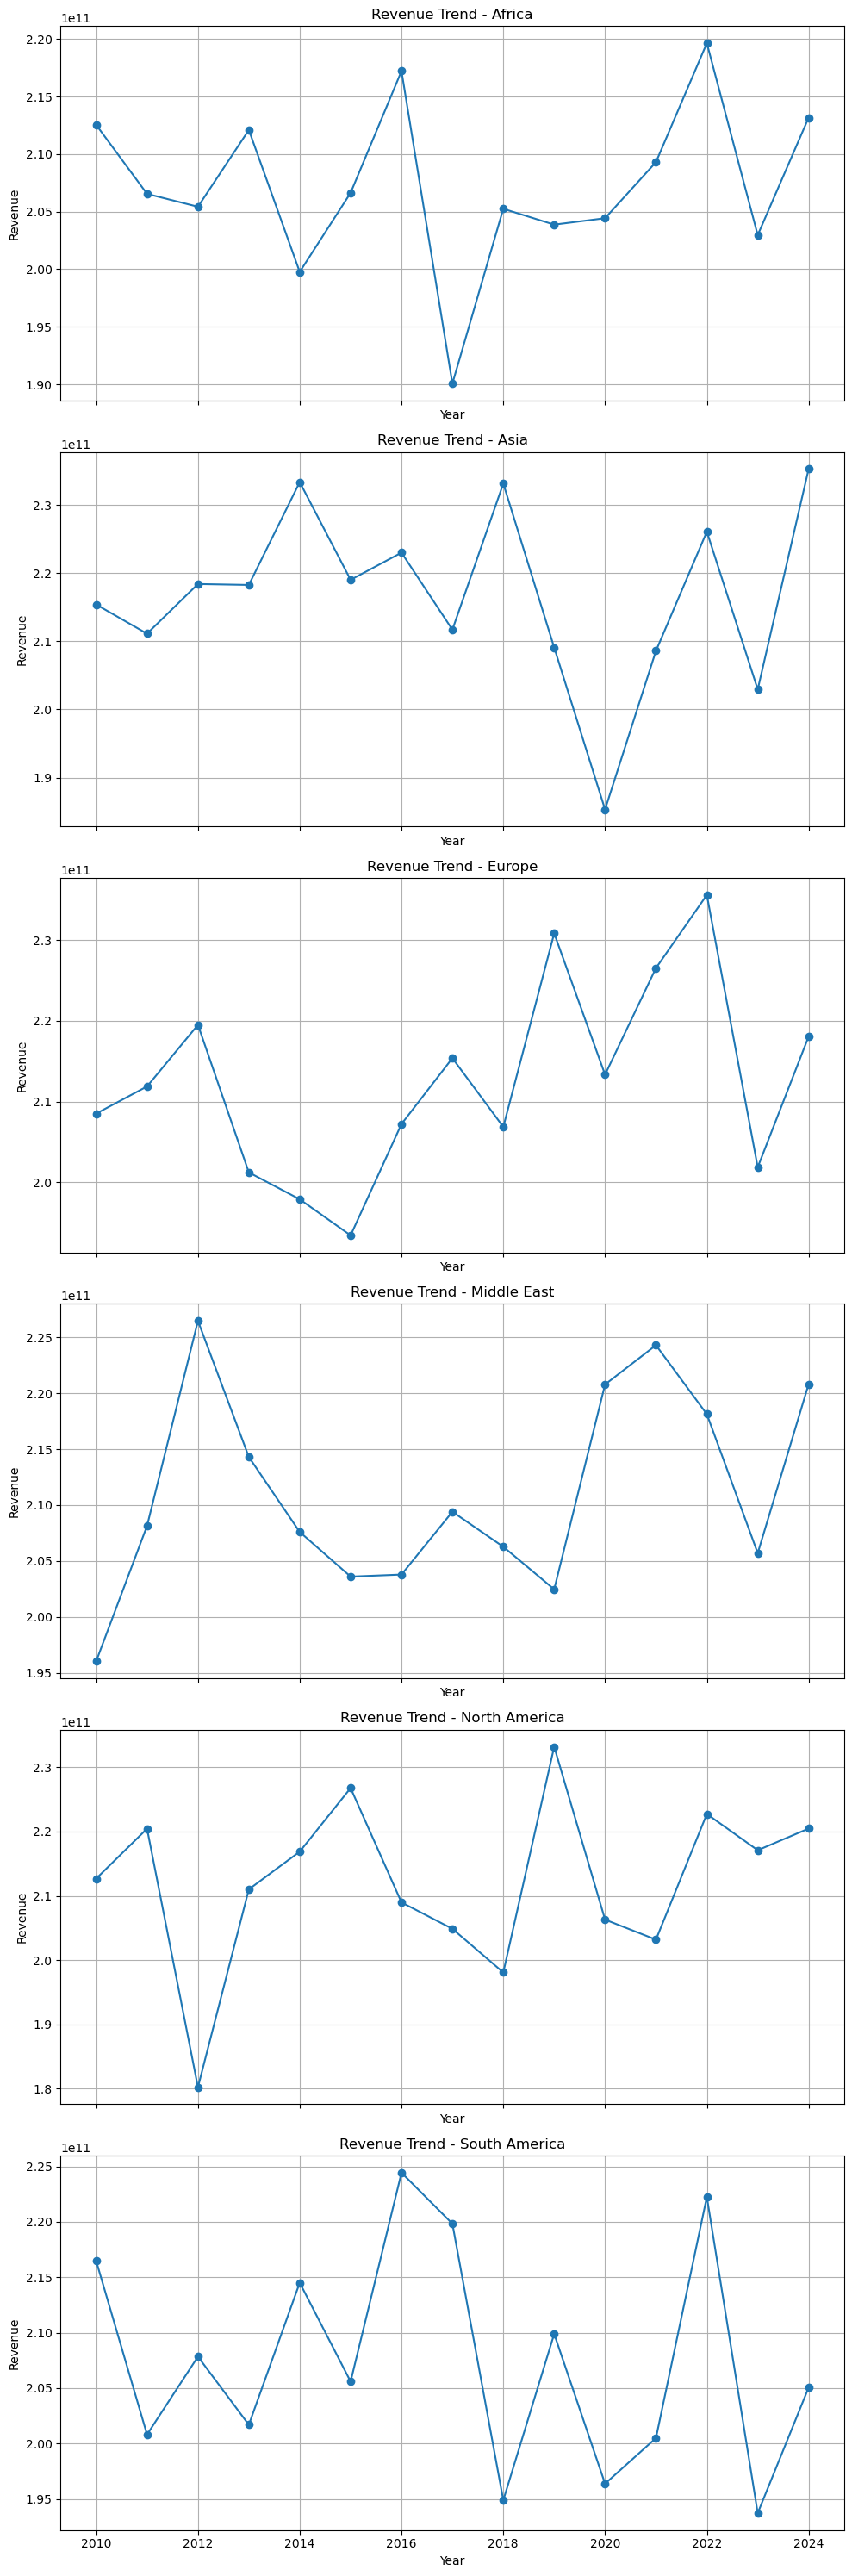

In [110]:
import matplotlib.pyplot as plt

# Group and reset index so Year and Region become columns again
test = data[["Region", "Year", "Revenue"]].groupby(["Region", "Year"]).sum().reset_index()

# Get unique regions
regions = test["Region"].unique()

# Create subplots (1 column, as many rows as regions)
fig, axes = plt.subplots(len(regions), 1, figsize=(10, 5 * len(regions)), sharex=True)

# If only one region, axes won’t be iterable
if len(regions) == 1:
    axes = [axes]

# Plot each region in its own subplot
for ax, region in zip(axes, regions):
    region_data = test[test["Region"] == region]
    ax.plot(region_data["Year"], region_data["Revenue"], marker='o', color='tab:blue')
    ax.set_title(f"Revenue Trend - {region}")
    ax.set_xlabel("Year")
    ax.set_ylabel("Revenue")
    ax.grid(True)

plt.tight_layout()
plt.show()


In [94]:
data[["Model","Revenue"]].groupby("Model").sum()

,Revenue
Model,
3 Series,1768534028214
5 Series,1735712423092
7 Series,1790070249282
M3,1667504386622
M5,1698467355916
X1,1752985285361
X3,1707951188482
X5,1708653383772
X6,1693423254979


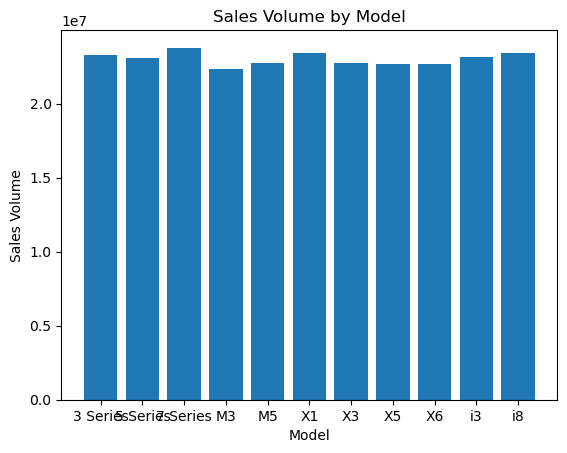

In [80]:
test = data[["Model","Sales_Volume"]].groupby("Model").sum()

plt.bar(test.index,test["Sales_Volume"])
plt.xlabel("Model")
plt.ylabel("Sales Volume")
plt.title("Sales Volume by Model")
plt.show()


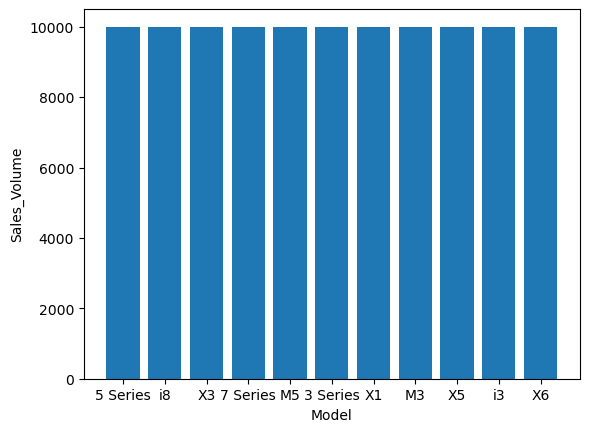

In [54]:
plt.bar(data['Model'],data['Sales_Volume'])
plt.xlabel('Model')
plt.ylabel('Sales_Volume')
plt.show()

In [13]:
# Identifying Objects- need to be converted to ML Friendly format
data.select_dtypes("object")

,Model,Region,Color,Fuel_Type,Transmission,Sales_Classification
0,5 Series,Asia,Red,Petrol,Manual,High
1,i8,North America,Red,Hybrid,Automatic,Low
2,5 Series,North America,Blue,Petrol,Automatic,Low
3,X3,Middle East,Blue,Petrol,Automatic,Low
4,7 Series,South America,Black,Diesel,Manual,Low
...,...,...,...,...,...,...
49995,i3,Asia,Red,Hybrid,Manual,High
49996,i3,Middle East,Silver,Electric,Manual,High
49997,5 Series,Middle East,Red,Petrol,Automatic,High
49998,i3,Asia,White,Electric,Automatic,High


In [79]:
list(data["Model"].unique())

# Label encode data points in Model column 
le=LabelEncoder()
data['Model_Encoded'] = le.fit_transform(data["Model"])

# Label encode data points in Region column 
data["Region_Encoded"] = le.fit_transform(data["Region"])

# Label encode data points in Color colum
data["Color_Encoded"] = le.fit_transform(data["Color"])

# Label encode data points in Fuel_Type colum
data["Fuel_Type_Encoded"] = le.fit_transform(data["Fuel_Type"])

# Label encode data points in Transmission colum




data.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,Model_Encoded
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High,1
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low,10
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low,1
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low,6
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low,2


In [85]:
data['Region'].unique()

array(['Asia', 'North America', 'Middle East', 'South America', 'Europe',
       'Africa'], dtype=object)